## Create TVB regionMapping

To project simulated neural data to sensor-space using TVB, a region mapping is needed to map nodes from a cortical parcellation to vertices of a cortical surface. This Notebook creates such a region mapping for the Desikan-Kiliany parcellation ("regionMapping_16k_66.txt")

In [28]:
%matplotlib nbagg
import numpy as np
import itertools
import matplotlib.pyplot as plt
from scipy.stats import zscore
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.mlab import detrend_mean as demean

In [41]:
## Import positions of vertices from cortical surface
f1 = open("/anaconda3/lib/python3.7/site-packages/tvb_data/surfaceData/vertices.txt", 'r')
vert_pos = np.reshape( f1.read().split() , (16384,3) ) . astype('float')
f1.close()

## Import positions of nodes from connectivity_66 cortical parcellation
f2 = open("/anaconda3/lib/python3.7/site-packages/tvb_data/connectivity/connectivity_66/centres.txt", 'r')
node_pos_tmp = np.array( f2.read().splitlines() )
f2.close()
node_pos_66 = np.array( [ line.split()[1:4] for line in node_pos_tmp ] ) . astype('float')

## Import positions of nodes from connectivity_76 cortical parcellation
f3 = open("/anaconda3/lib/python3.7/site-packages/tvb_data/connectivity/connectivity_76/centres.txt", 'r')
node_pos_tmp = np.array( f3.read().splitlines() )
f3.close()
node_pos_76 = np.array( [ line.split()[1:4] for line in node_pos_tmp ] ) . astype('float')

## Import positions of nodes from cortical parcellation
f4 = open("/anaconda3/lib/python3.7/site-packages/tvb_data/regionMapping/regionMapping_16k_76.txt", 'r')
#node_pos_tmp = np.array( f3.read().splitlines() )
regionMapping_tmp = f4.read().split()
f4.close()
regionMapping_76_og = np.array( regionMapping_tmp ) . astype('float')

<IPython.core.display.Javascript object>


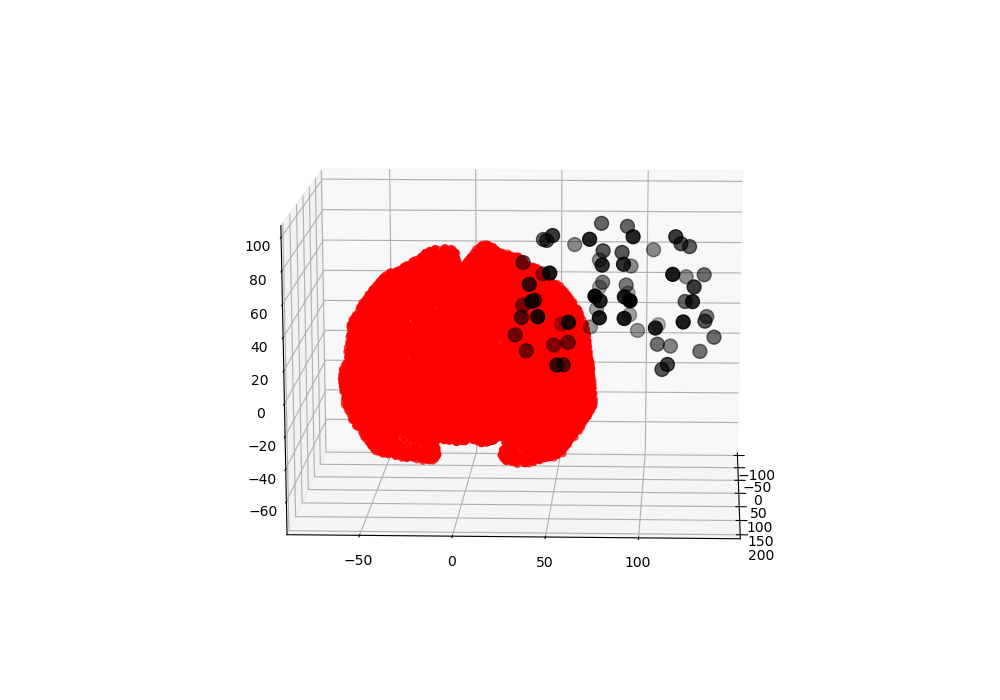

In [23]:
## Visualise initial coordinates

## Scatter plot of vertex and node positions
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( node_pos_66[:,0] , node_pos_66[:,1] , node_pos_66[:,2], color = "black" , s=100); 
ax.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = "red");
plt.show()

<IPython.core.display.Javascript object>


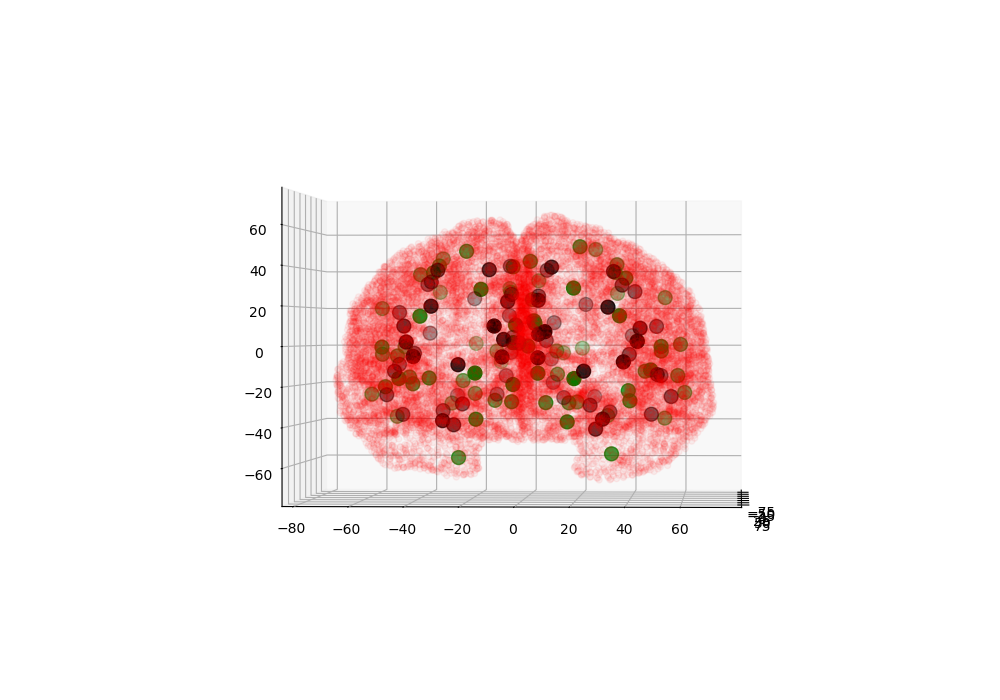

In [64]:
## Align vertex and node positions by normalisation (zscore) and scaling (sc_fac)

sc_fac = 1.1  ## trial-and-error, scaling factor to apply onto zscored connectivity_66 coordinates

## Scatter plot of vertex and node positions
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( demean(node_pos_66[:,0]) , demean(node_pos_66[:,1]) , demean(node_pos_66[:,2]), color = "black" , s=100);
ax.scatter3D( demean(node_pos_76[:,0]) , demean(node_pos_76[:,1]) , demean(node_pos_76[:,2]), color = "green" , s=100);
ax.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = "red" , alpha=0.05);
plt.show()

<IPython.core.display.Javascript object>


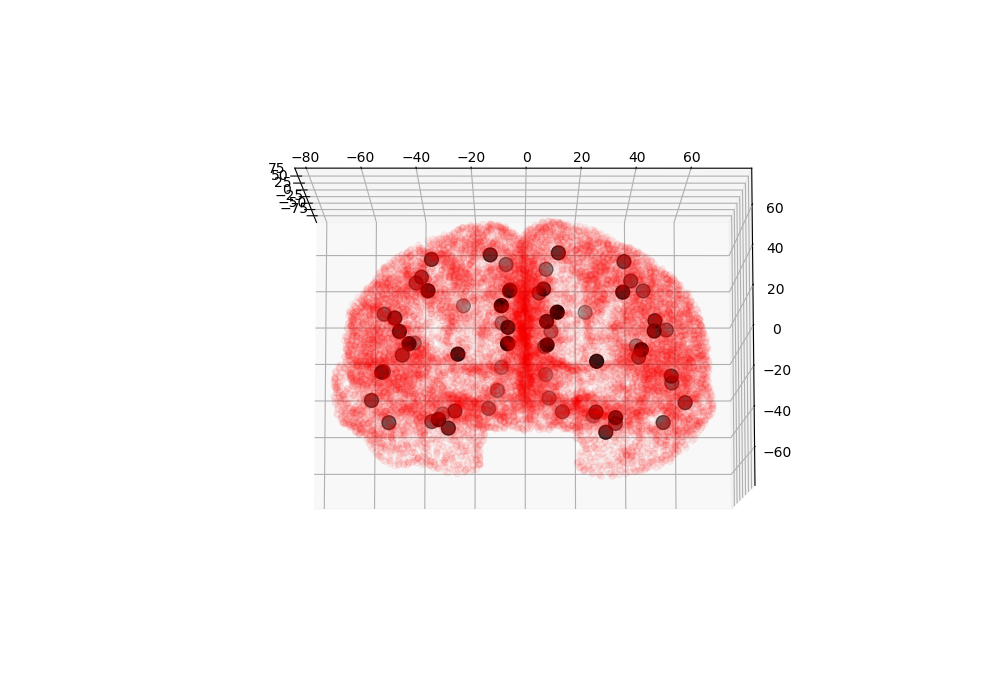

In [65]:
## Assign aligned positions

node_pos_66_sc = np.vstack(( sc_fac*demean(node_pos_66[:,0]) , sc_fac*demean(node_pos_66[:,1]) , sc_fac*demean(node_pos_66[:,2]) )).T

## Confirm that alignment is adequate

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( node_pos_66_sc[:,0] , node_pos_66_sc[:,1] , node_pos_66_sc[:,2], color = "black" , s=100);
ax.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = "red" , alpha=0.05);
plt.show()

<IPython.core.display.Javascript object>


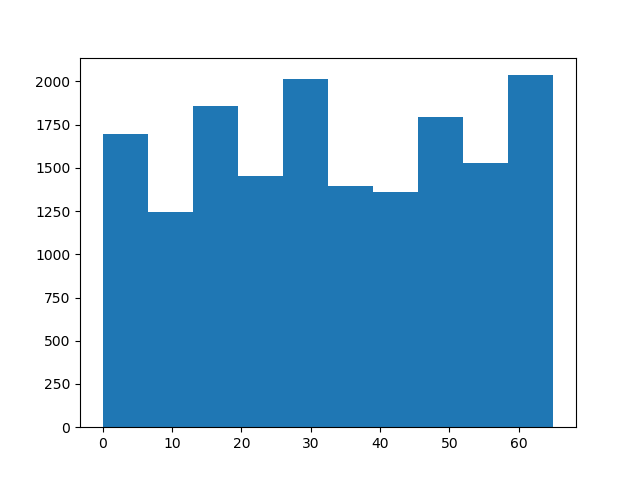

In [66]:
## For each vertex, find closest node using Euclidean distance

regionMapping_66 = []
for verti in np.arange(len(vert_pos)):
    dist = []
    for nodei in np.arange(len(node_pos_sc)):
        dist.append( np.sum( (vert_pos[verti,:] - node_pos_66_sc[nodei,:]) ** 2 ))
        
    regionMapping_66 . append( dist.index( np.min(dist) ) )
    
## Histogram of nodes corresponding to closest node to individual vertices
plt.figure(figsize=[4.,3.])
plt.hist(regionMapping_66)
plt.show()

<IPython.core.display.Javascript object>


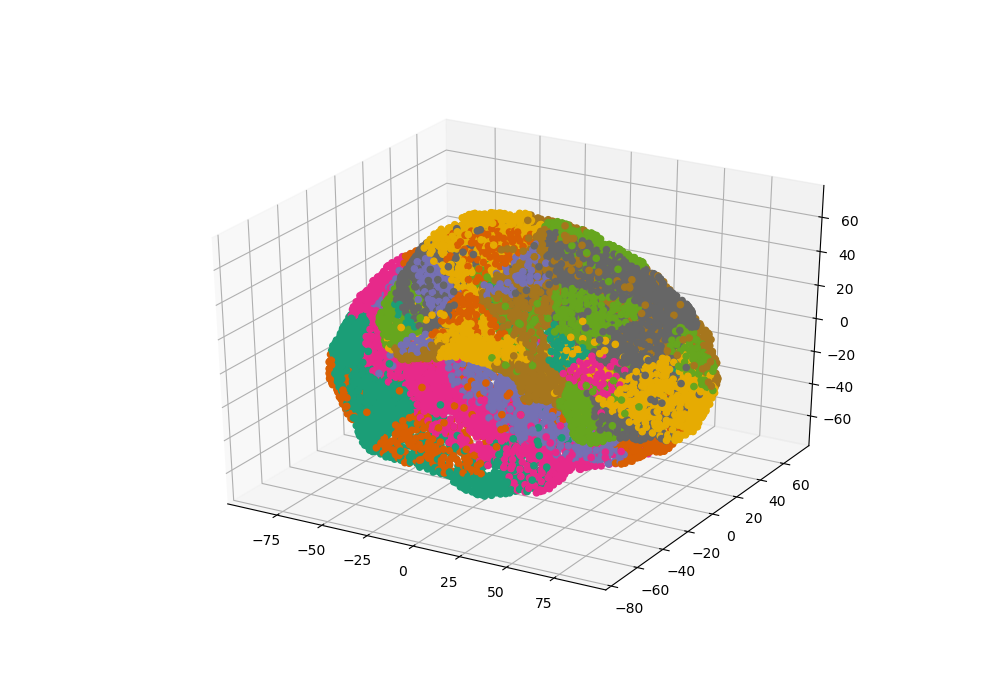

In [86]:
## Color map of matching between vertices and associated closest node

## Creating colormap to map vertices to node
norm = colors.Normalize(vmin=0, vmax=65)
f2rgb = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('Dark2'))
rgb = f2rgb.to_rgba(regionMapping_66)

## 3D Scatter plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = rgb , alpha=1);
plt.show()

In [88]:
## Reformat region mapping and save to file: "regionMapping_16k_66.txt"

regionMapping_str = str(list(regionMapping_66)).strip("[").strip("]").replace(',','')

with open("/anaconda3/lib/python3.7/site-packages/tvb_data/regionMapping/regionMapping_16k_66.txt", 'w') as f:
    f.write("%s" % regionMapping_str)

# Test connectivity_76

<IPython.core.display.Javascript object>


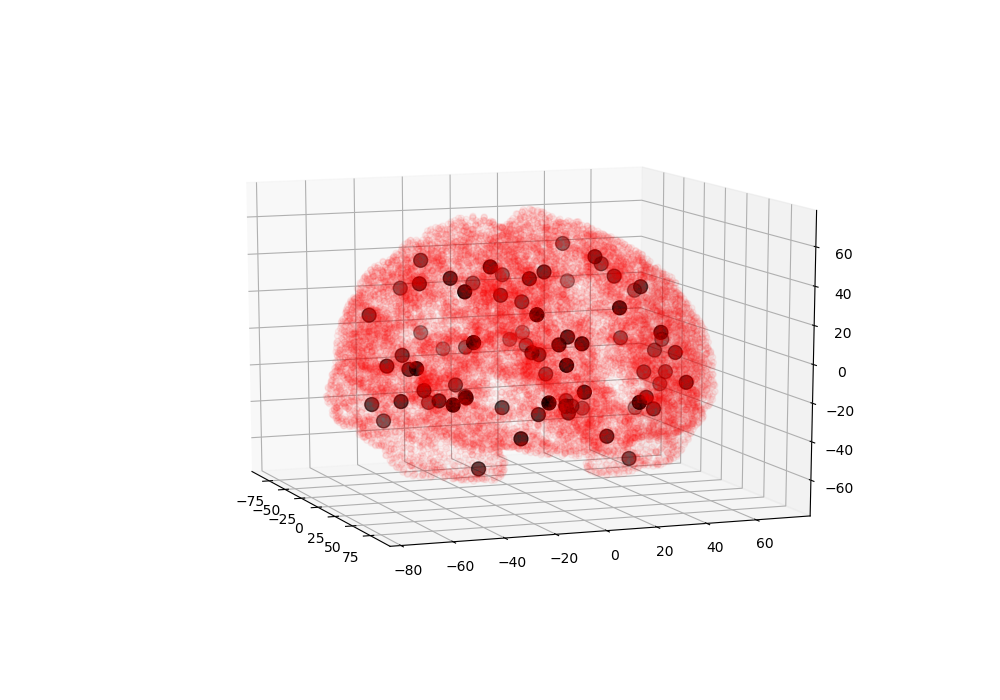

In [20]:
## Scatter plot of vertex and node positions
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( node_pos_76[:,0] , node_pos_76[:,1] , node_pos_76[:,2], color = "black" , s=100); 
ax.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = "red" , alpha=0.05);
plt.show()

<IPython.core.display.Javascript object>


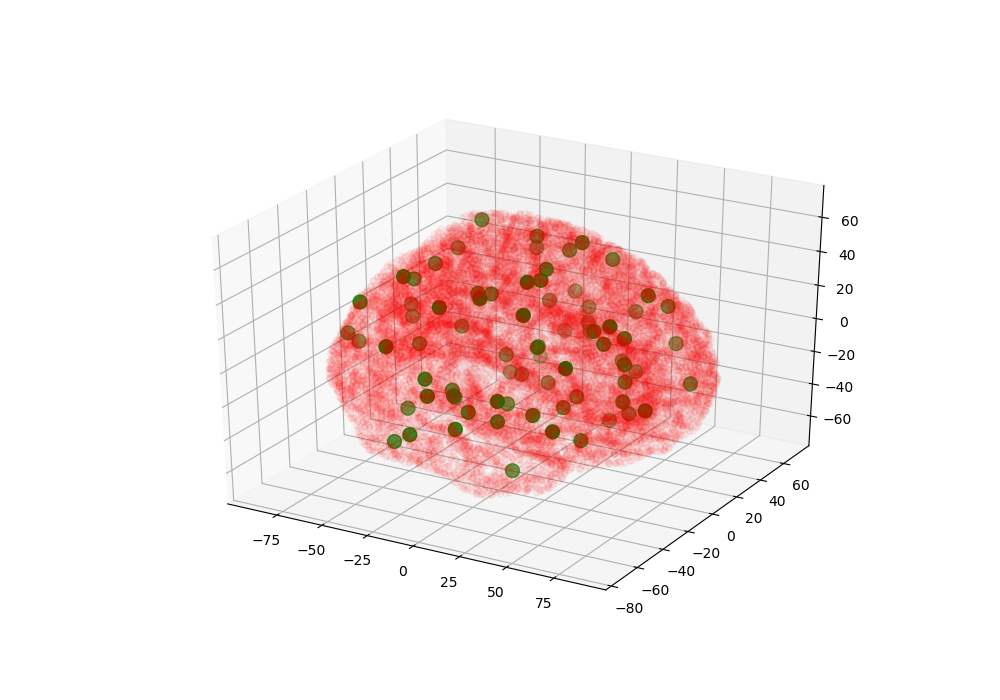

In [70]:
## Align vertex and node positions by normalisation (zscore) and scaling (sc_fac)

sc_fac = 1.05  ## trial-and-error, scaling factor to apply onto zscored connectivity_66 coordinates

## Scatter plot of vertex and node positions
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( sc_fac*demean(node_pos_76[:,0]) , sc_fac*demean(node_pos_76[:,1]) , sc_fac*demean(node_pos_76[:,2]), color = "green" , s=100);
ax.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = "red" , alpha=0.05);
plt.show()

<IPython.core.display.Javascript object>


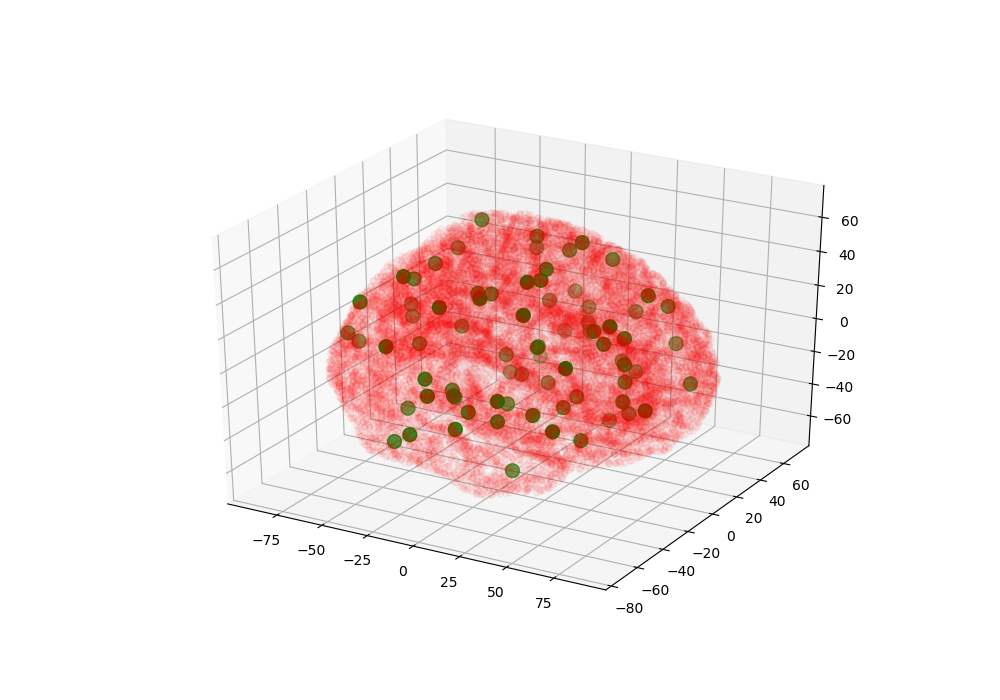

In [72]:
## Assign aligned positions

node_pos_76_sc = np.vstack(( sc_fac*demean(node_pos_76[:,0]) , sc_fac*demean(node_pos_76[:,1]) , sc_fac*demean(node_pos_76[:,2]) )).T

## Confirm that alignment is adequate

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( node_pos_76_sc[:,0] , node_pos_76_sc[:,1] , node_pos_76_sc[:,2], color = "green" , s=100);
ax.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = "red" , alpha=0.05);
plt.show()

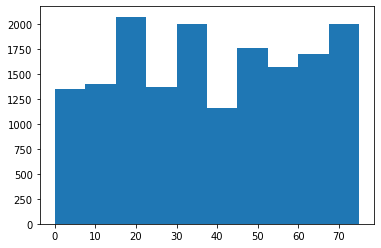

In [89]:
## For each vertex, find closest node using Euclidean distance

regionMapping_76 = []
for verti in np.arange(len(vert_pos)):
    dist = []
    for nodei in np.arange(len(node_pos_76)):
        dist.append( np.sqrt( np.sum( (vert_pos[verti,:] - node_pos_76[nodei,:]) ** 2 )))
        
    regionMapping_76 . append( dist.index( np.min(dist) ) )
    
## Histogram of nodes corresponding to closest node to individual vertices
plt.figure(figsize=[4.,3.])
plt.hist(regionMapping_76)
plt.show()

<IPython.core.display.Javascript object>


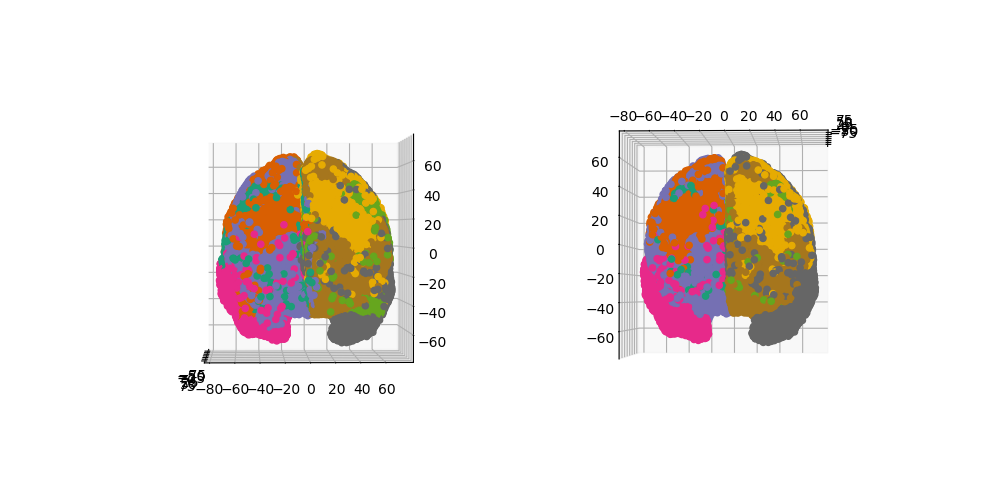

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


In [87]:
## Color map of matching between vertices and associated closest node

## 3D Scatter plot
## Creating colormap to map vertices to node
fig = plt.figure(figsize = (10, 5))
norm = colors.Normalize(vmin=0, vmax=75)
f2rgb = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('Dark2'))

plt.subplot(121)
rgb = f2rgb.to_rgba(regionMapping_76)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = rgb , alpha=1)

plt.subplot(122)
rgb_og = f2rgb.to_rgba(regionMapping_76_og)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter3D( vert_pos[:,0] , vert_pos[:,1] , vert_pos[:,2], color = rgb_og , alpha=1)

plt.show()